### **Machine learning**
### in this part we will use machine learning to predict the Air Quality Index (AQI) of a Madrid based on the data we have collected from the previous part.

### **Data**
### The data we will use is the data we have collected from the previous part, which is the data of the air quality index (AQI) of Madrid from 2001 to 2022. The data is in the form of a csv file, which contains the following columns:
  - Year: year of the data
  - Month: month of the data
  - BEN Benzene (µg/m³)
  - CH4 Methane (mg/m³)
  - CO Carbon monoxide (mg/m³)
  - EBE Ethylbenzene (µg/m³)
  - NMHC Non-methane hydrocarbons (mg/m³) 
  - NO Nitrogen monoxide (µg/m³)
  - NO2 Nitrogen dioxide (µg/m³)
  - NOx Nitrogen oxides (µg/m³)
  - O3 Ozone (µg/m³)
  - PM10 Particles < 10 µm (µg/m³)
  - PM25 Particles < 2.5 µm (µg/m³) 
  - SO2 Sulfur dioxide (µg/m³)
  - TCH Total hydrocarbons (mg/m³)
  - TOL Toluene (µg/m³)
  - AQI category: the category of the air quality index (AQI) of Madrid

### **Methodology**
### In this part we will use the following steps to predict the air quality index (AQI) of Madrid:
  - **Data sampling**: In this step we will sample the data.
  - **Data split**: In this step we will split the data into training data and testing data.
  - **Model training**: In this step we will train the machine learning model.
  - **Model evaluation**: In this step we will evaluate the machine learning model.
  - **Model tuning**: In this step we will tune the machine learning model.
  - **Model prediction**: In this step we will predict the air quality index (AQI) of Madrid.


In [676]:
# load the preprocessed data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pip install xgboost
df = pd.read_csv('data\MadridPolution2001-2022_cleaned.csv')
df.head()


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL,Month,Year,AQI_category
0,0.0,1.0,0.0,0.0,0.0,6.500000,24.000000,34.000000,44.000000,6.500000,8.0,5.000000,1.0,2.000000,4,0,1
1,0.0,1.0,0.0,0.0,0.0,12.000000,29.666667,48.333333,31.000000,14.666667,8.0,4.000000,1.0,2.666667,4,0,0
2,0.0,1.0,0.0,0.0,0.0,23.000000,31.000000,66.500000,33.000000,11.000000,8.0,4.500000,1.0,2.000000,4,0,1
3,0.0,1.0,0.0,0.0,0.0,8.666667,34.333333,47.666667,31.666667,10.333333,8.0,6.333333,1.0,2.666667,4,0,0
4,0.0,1.0,0.0,0.0,0.0,10.200000,22.800000,38.400000,30.200000,13.200000,8.0,7.800000,1.0,2.600000,4,0,0


In [677]:
# select the features and target 'NO', 'NO2', 'NOx', 'PM10', 'PM25', 'TOL', 'month', 'year', 'AQI_category'
df = df[['NO', 'NO2', 'NOx', 'PM10', 'PM25', 'TOL', 'Month', 'Year', 'AQI_category']]
df.head()

,NO,NO2,NOx,PM10,PM25,TOL,Month,Year,AQI_category
0,6.500000,24.000000,34.000000,6.500000,8.0,2.000000,4,0,1
1,12.000000,29.666667,48.333333,14.666667,8.0,2.666667,4,0,0
2,23.000000,31.000000,66.500000,11.000000,8.0,2.000000,4,0,1
3,8.666667,34.333333,47.666667,10.333333,8.0,2.666667,4,0,0
4,10.200000,22.800000,38.400000,13.200000,8.0,2.600000,4,0,0


In [678]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X = df.drop('AQI_category', axis=1)
y = df['AQI_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4848, 8)
(2079, 8)
(4848,)
(2079,)


In [679]:
# import required packages
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [680]:
# convert the output to a readable format
def convert_output(x):
    if x == 0:
        return 'Very Good'
    elif x == 1:
        return 'Good'
    elif x == 2:
        return 'Fair'
    elif x == 3:
        return 'Poor'
    else:
        return 'Out of Range'

In [681]:
# train the model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# make predictions
predictions = xgb.predict(X_test)
predictions = pd.Series(predictions)
predictions.value_counts()

# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           0       0.84      0.80      0.82       701
           1       0.78      0.85      0.81      1135
           2       0.62      0.43      0.51       236
           3       0.00      0.00      0.00         7

    accuracy                           0.78      2079
   macro avg       0.56      0.52      0.53      2079
weighted avg       0.78      0.78      0.78      2079

[[560 140   1   0]
 [109 967  59   0]
 [  0 135 101   0]
 [  0   4   3   0]]


c:\Users\Turki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Turki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Turki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [682]:
# view the predictions
predictions = predictions.apply(convert_output)
predictions.value_counts()

Good         1246
Very Good     669
Fair          164
Name: count, dtype: int64

In [683]:
# train the model with random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# make predictions
predictions = rfc.predict(X_test)
predictions = pd.Series(predictions)
predictions.value_counts()

# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       701
           1       0.77      0.86      0.81      1135
           2       0.70      0.42      0.53       236
           3       0.00      0.00      0.00         7

    accuracy                           0.78      2079
   macro avg       0.57      0.52      0.54      2079
weighted avg       0.78      0.78      0.78      2079

[[555 145   1   0]
 [122 976  37   0]
 [  0 137  99   0]
 [  0   3   4   0]]


c:\Users\Turki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Turki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Turki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [684]:
# view the predictions
predictions = predictions.apply(convert_output)
predictions.value_counts()

Good         1261
Very Good     677
Fair          141
Name: count, dtype: int64

In [685]:
# train the model with logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

# make predictions
predictions = logmodel.predict(X_test)
predictions = pd.Series(predictions)
predictions.value_counts()

# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

c:\Users\Turki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.69      0.62      0.65       701
           1       0.68      0.81      0.74      1135
           2       0.69      0.28      0.39       236
           3       0.00      0.00      0.00         7

    accuracy                           0.68      2079
   macro avg       0.52      0.43      0.45      2079
weighted avg       0.68      0.68      0.67      2079

[[434 266   1   0]
 [190 917  25   3]
 [  3 168  65   0]
 [  0   4   3   0]]


In [686]:
# view the predictions
predictions = predictions.apply(convert_output)
predictions.value_counts()

Good         1355
Very Good     627
Fair           94
Poor            3
Name: count, dtype: int64

In [687]:
# compare the models
from sklearn.metrics import accuracy_score
print('Accuracy of XGBoost:\n', accuracy_score(y_test, xgb.predict(X_test)))
print('Accuracy of RandomForest:\n', accuracy_score(y_test, rfc.predict(X_test)))
print('Accuracy of LogisticRegression:\n', accuracy_score(y_test, logmodel.predict(X_test)))

Accuracy of XGBoost:
 0.783068783068783
Accuracy of RandomForest:
 0.7840307840307841
Accuracy of LogisticRegression:
 0.6810966810966811


In [688]:
# plot feature importance
def plot_feature_importance(model):
    plt.figure(figsize=(10, 6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_features)

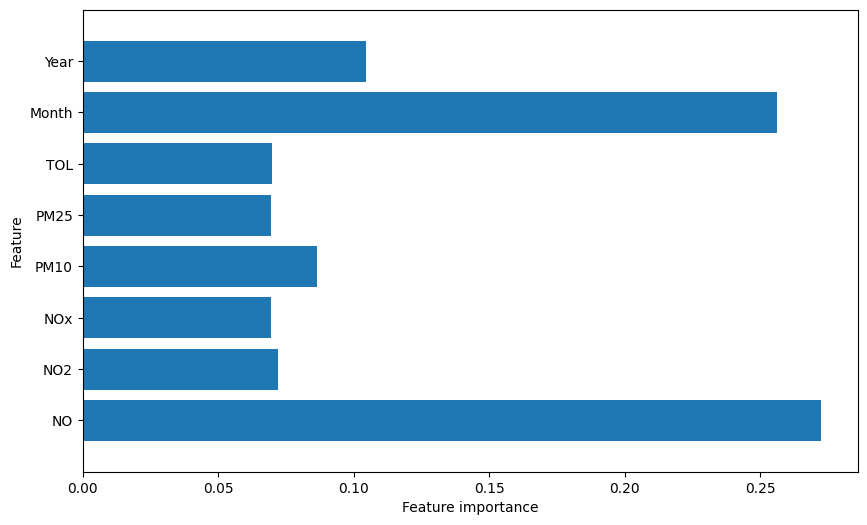

In [689]:
# plot feature importance for XGBoost
plot_feature_importance(xgb)

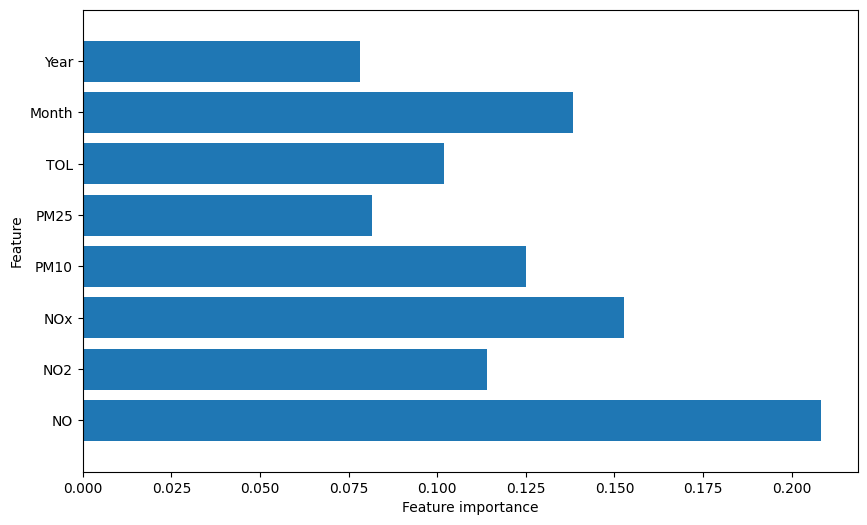

In [690]:
# plot feature importance for RandomForest
plot_feature_importance(rfc)

In [691]:
# plot the learning curve and validation curve
from sklearn.model_selection import learning_curve, validation_curve
def plot_curve(model, param, param_range, title):
    train_scores, test_scores = validation_curve(model, X_train, y_train, param_name=param, param_range=param_range, cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(param_range, train_scores_mean, label='Training score')
    plt.plot(param_range, test_scores_mean, label='Cross-validation score')
    plt.title(title)
    plt.xlabel(param)
    plt.ylabel('Accuracy score')
    plt.legend()
    plt.show()

def plot_learning_curve(model, title,):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training score')
    plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
    plt.title(title)
    plt.xlabel('Training set size')
    plt.ylabel('Accuracy score')
    plt.legend()
    plt.show()

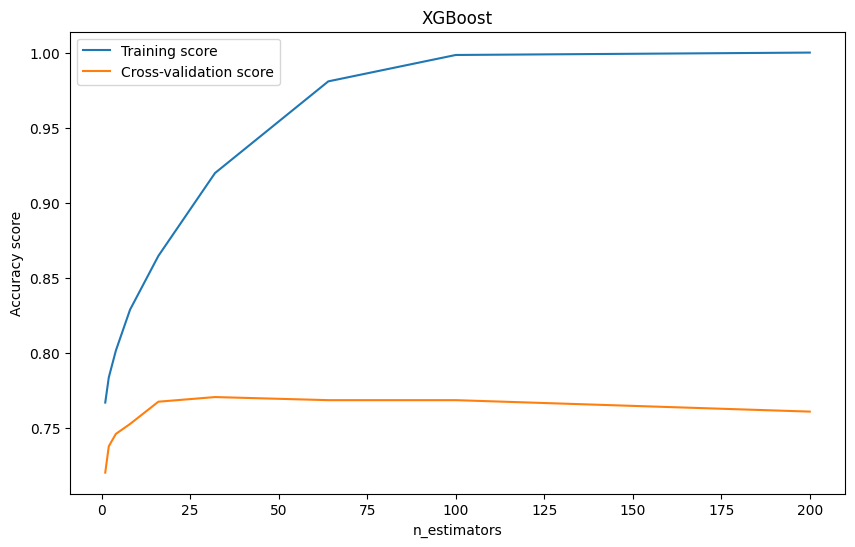

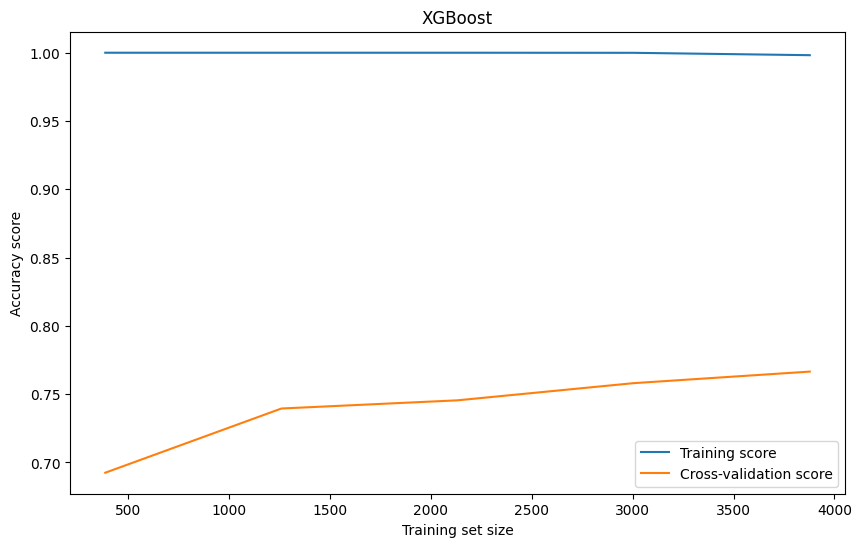

In [692]:
# plot the learning curve and validation curve for XGBoost
plot_curve(xgb, 'n_estimators', [1, 2, 4, 8, 16, 32, 64, 100, 200], 'XGBoost')
plot_learning_curve(xgb, 'XGBoost')

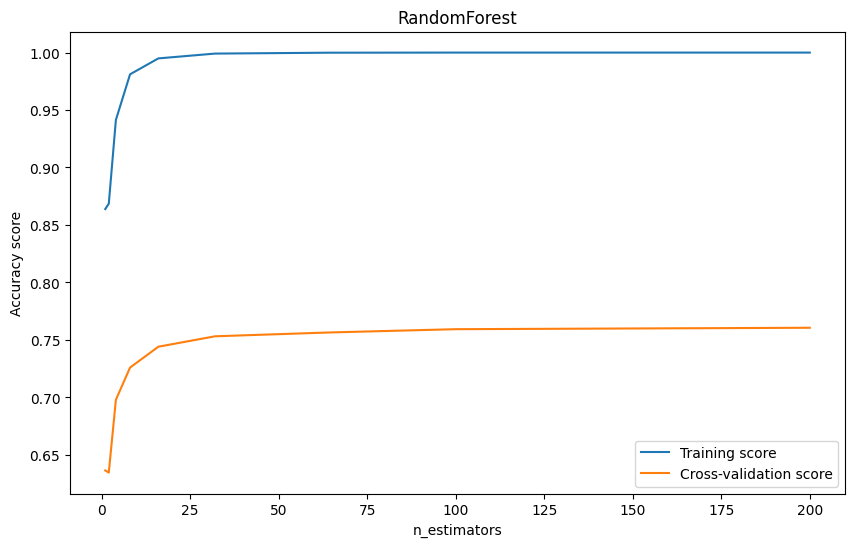

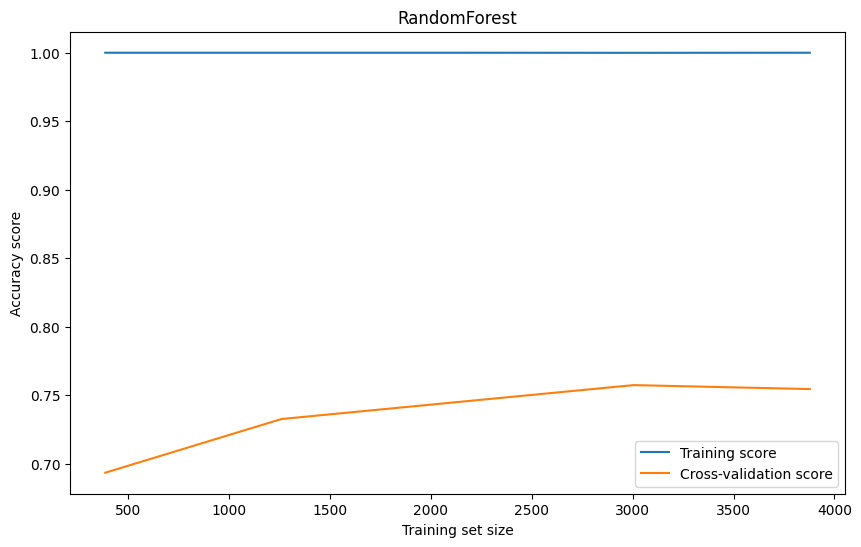

In [693]:
# plot the learning curve and validation curve for RandomForest
plot_curve(rfc, 'n_estimators', [1, 2, 4, 8, 16, 32, 64, 100, 200], 'RandomForest')
plot_learning_curve(rfc, 'RandomForest')

c:\Users\Turki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Turki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

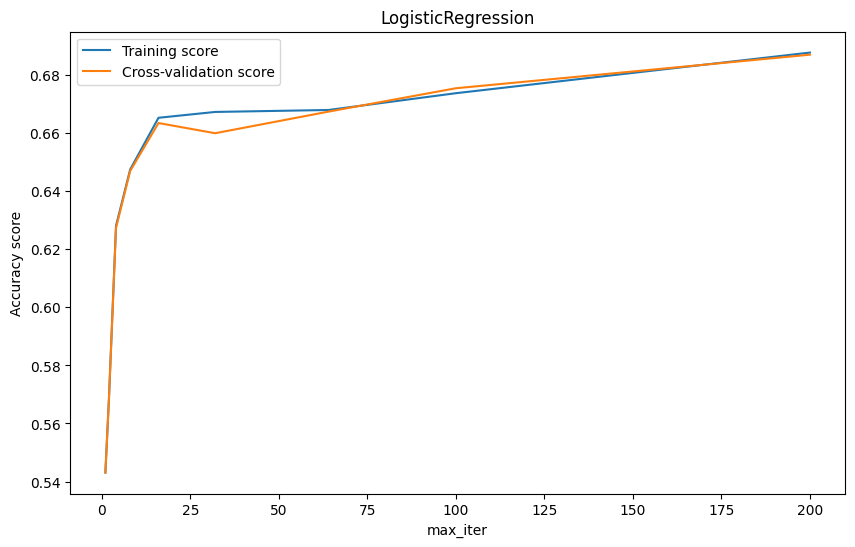

c:\Users\Turki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Turki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

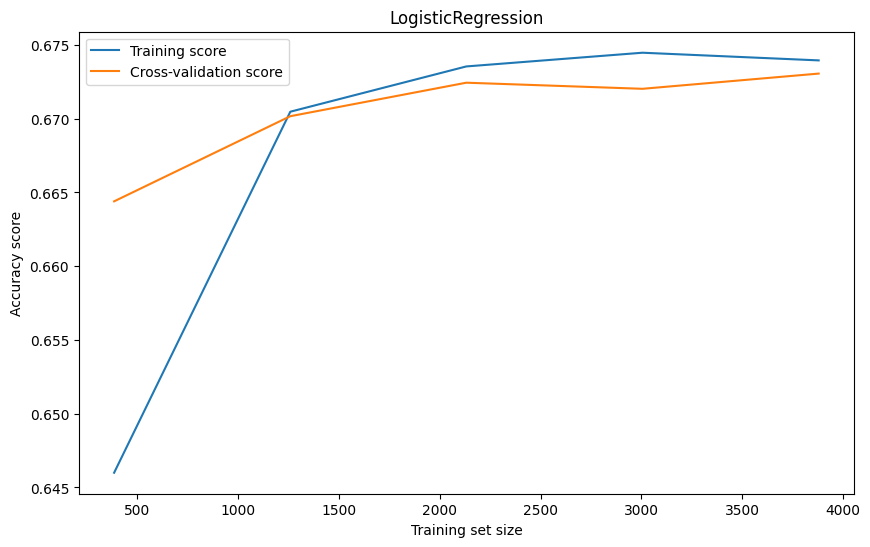

In [694]:
# plot the learning curve and validation curve for LogisticRegression
plot_curve(logmodel, 'max_iter', [1, 2, 4, 8, 16, 32, 64, 100, 200], 'LogisticRegression')
plot_learning_curve(logmodel, 'LogisticRegression')